# Logistic Distribution

Dustin D. Gerrard
<br>
September 2018

This notebook describes the Logistic distribution. The cumulative distribution function of this distribution is the logistic equation.
<br>
<br>
https://en.wikipedia.org/wiki/Logistic_distribution
<br>
http://reliawiki.org/index.php/The_Logistic_Distribution
<br>
<br>
Examples:
* In logistic regression the latent error variables follow a logistic distribution.
* Similar to and can be used in place of the normal distribution. The logistic distribution is advantageous because it can be solved analytically.

<h2><center><u> Logistic p.d.f.</u></center></h2>

\begin{equation*}
\Large
\frac{e^{-\frac{(x-\mu)}{s}}}{s(1+e^{-\frac{(x-\mu)}{s}})^2}
\end{equation*}

In [1]:
from IPython.core.display import Image
# from PIL import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/6/66/Logisticpdfunction.svg', width=560, height=560) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import logistic
from scipy.special import erf, erfinv, gamma, gammainc

# Logistic Distribution using scipy

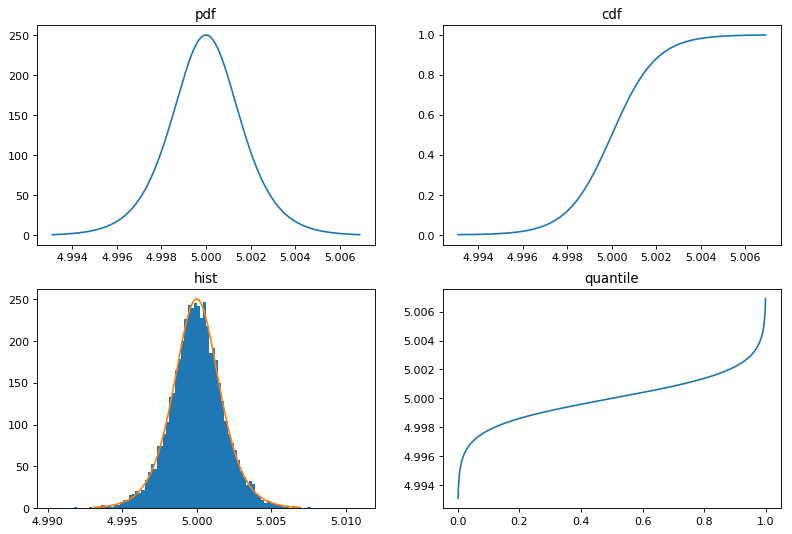

In [12]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html
mu = 5
s = 0.001
x = np.linspace(logistic.ppf(0.001, mu, s), logistic.ppf(0.999, mu, s), 1000) # ppf = percent point function
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(221)
plt.plot(x, logistic.pdf(x, mu, s)) # pdf = probability distribution function
plt.title('pdf')
plt.subplot(222)
plt.plot(x, logistic.cdf(x, mu, s)) # cdf = cumumlative distribution function
plt.title('cdf')
plt.subplot(223)
r = logistic.rvs(k, s, size=10000) # rvs = random variates
plt.hist(r, 100, density=True)
plt.plot(x, logistic.pdf(x, mu, s))
plt.title('hist')
r = logistic.rvs(mu, s, size=100000)
plt.subplot(224)
q = np.linspace(0.001, 0.999, 1000)
plt.plot(q, logistic.ppf(q, mu, s))
plt.title('quantile')
plt.show()

In [16]:
mean, var, skew, kurt = logistic.stats(k, moments='mvsk')
median = logistic.median(loc=mu, scale=s)

# Logistic Distribution explicitly in Python

In [17]:
def logisticDist(k):
    Xs = np.linspace(0, 10+k/10, 101)
    Ys = 1/(pow(2,k/2-1)*gamma(k/2))*pow(Xs,k-1)*np.exp(-pow(Xs,2)/2)
    CDFs = gammainc(k/2, pow(Xs,2)/2)
    return Xs, Ys, CDFs

### pdf - probability distribution function

In [ ]:
sigma = 0.5 # mean and standard deviation
Xs, Ys, CDFs = chiDist(3)
plt.plot(Xs,Ys)
plt.show()

In [ ]:
k = 10
A = np.sqrt(np.random.chisquare(k, 1000000))
Xs, Ys, CDFs = chiDist(k)
fig, ax1 = plt.subplots()
plt.hist(A, 100, density=True)
plt.plot(Xs, Ys, linewidth=2, color='r')
plt.show()

### cdf - cumulative distribution function

In [ ]:
k = 3 # mean and standard deviation
Xs, Ys, CDFs = chiDist(k)
k2 = 20
Xs2, Ys2, CDFs2 = chiDist(k2)
plt.plot(Xs,CDFs)
plt.plot(Xs2,CDFs2)
plt.show()

### Quantile

In [ ]:
lambda0 = 2
Fs = np.linspace(0,1,100001)
Qs = sigma*np.sqrt(-2*np.log(1-Fs))
plt.plot(Fs,Qs)
plt.show()